In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Apertura de los archivos

In [2]:
df_original = pd.read_excel("netflix_titles.xlsx")

In [24]:
df_original.head(30)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,0.03,NaN,"Jo√£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19:00,Jorge Michel Grau,"Demi√°n Bichir, H√©ctor Bonilla, Oscar Serrano...",Mexico,2016-12-23,2016,TV-MA,4,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59:00,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,93,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,78,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,80,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Be≈üik√ßioƒülu, Yasemin Allen, Melis Bir...",Turkey,2017-07-01,2016,TV-MA,123,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,1,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,1997,R,95,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,2019-04-01,2019,TV-14,119,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,118,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [4]:
import sqlite3
indice = list()
#for i in range(len(df_original)):
#    indice.append(i) #La mamada de tabla no trae indices, así que le tenemos que dar una lista con la longirtud, de la misma, es decir, un indice
#df_original.reindex(indice)

def limpiar_etl(df_original):
    #checar codificacion (UTF8)(acentos, ñ, dieresis, ...)
    #columna duracion, truncarla a enteros, remplazar cualquier otra cosa que no sea x minutos con 0, y borrar la palabra min, para que sean puros enteros
    #columna de año,. truncarla a enteros
    #columna de date_added invertigar formato de fecha y seleccionar el mas adecuado , como para pandas y sql
    #drop.duplicates()    .astype(tipo de dato)    <-- documentacion de pandas
        #containers o if seasons in cadena ...
    def limpiaDuracion():
        lista_aux =[] 
        for i in df_original['duration']:
            if 'min' in i:
                lista_aux.append(i[0:-3])
            if 'Seasons' in i:
                lista_aux.append(i[0:-7])
            if 'Season' in i:
                lista_aux.append(i[0:-7])
    
        for i in lista_aux:
            i.strip()
            i = int(i)
        df_limpio = pd.DataFrame({"duration": lista_aux})

        df_original.drop(columns=['duration'])
        df_original['duration'] = df_limpio['duration']

    def anioEnteros():
        for i in df_original['release_year']:
            i = int(i)

    def fechasCorrectas():
        lista_aux = []
        for i in df_original['date_added']:
            i = pd.to_datetime(i)
            lista_aux.append(i)
        df_limpio = pd.DataFrame({'date_added': lista_aux})
        df_original.drop(columns = ['date_added'])
        df_original['date_added'] = df_limpio['date_added']
        
    
    limpiaDuracion()
    anioEnteros()
    fechasCorrectas()
    df_limpio = df_original
    return df_limpio

class etl():
    def charge_file(self, df_limpio):
        lista1= []
        for i in range(len(df_limpio)):
            lista_aux = []
            lista_aux.append(i)
            lista_aux.append(str(df_limpio["show_id"][i]))
            lista_aux.append(str(df_limpio["type"][i]))
            lista_aux.append(str(df_limpio["title"][i]))
            lista_aux.append(str(df_limpio["cast"][i]))
            lista_aux.append(str(df_limpio["country"][i]))
            lista_aux.append(str(df_limpio["date_added"][i]))
            lista_aux.append(str(df_limpio["release_year"][i]))
            lista_aux.append(str(df_limpio["rating"][i]))
            lista_aux.append(str(df_limpio["duration"][i]))
            lista_aux.append(str(df_limpio["listed_in"][i]))
            lista_aux.append(str(df_limpio["description"][i]))
            lista1.append(lista_aux)
        return tuple(lista1)

    def charge_sql(self, lista):
        con = sqlite3.connect('netflix_columns.db')
        cursor = con.cursor()
    
        
        query = "INSERT INTO netflix_titles (netflix_titles_id, show_id, type, title, cast, country, date_added, release_year, rating, duration, listed_in, description) VALUES(?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?,?)"
        cursor.executemany(query, lista)
        con.commit()
        cursor.close()
        
    def create_db(self):
        con = sqlite3.connect('netflix_columns.db')
        cursor = con.cursor()
    
        cursor.execute(
            '''
            CREATE TABLE netflix_titles(
                netflix_titles_id INTEGER PRIMARY KEY,
                show_id VARCHAR(10),
                type VARCHAR(10),
                title VARCHAR(90),
                cast VARCHAR2(90),
                country VARCHAR2(20),
                date_added VARCHAR2(20),
                release_year VARCHAR2(20),
                rating VARCHAR2(10),
                duration VARCHAR2(90),
                listed_in VARCHAR2(90),
                description VARCHAR2(90)
            )
            ''')
        con.commit()
        cursor.close()

    def comprobacion(self, inicio):
        con = sqlite3.connect('netflix_columns.db')
        cursor = con.cursor()

        cursor.execute("SELECT * FROM netflix_titles ")
        rows = cursor.fetchall()
        con.commit()
        cursor.close()
        return (len(inicio) == len(rows))


In [5]:
etl1 = etl()
#etl1.create_db()
#carga = etl1.charge_file(limpiar_etl(df_original))
#etl1.charge_sql(carga)
#etl1.comprobacion(carga)
df = limpiar_etl(df_original)
#df_original.head(50)


<Axes: >

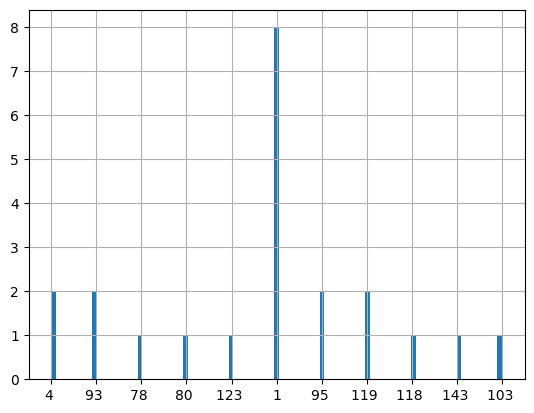

In [17]:
df["duration"][0:100].hist(bins=np.linspace(0,10,100))

## Opcion 2
Sacando informacion de un sql a un dataframe

<Axes: >

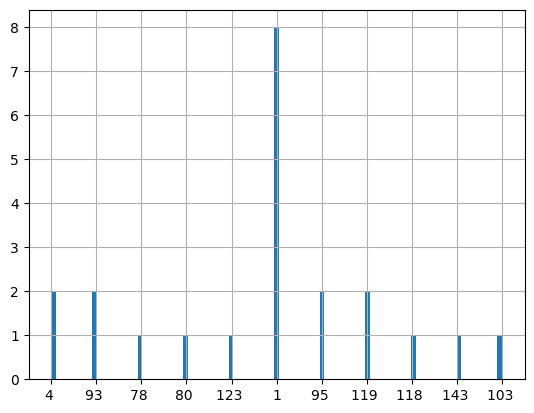

In [15]:
con = sqlite3.connect('netflix_columns.db')
cursor = con.cursor()

query = "SELECT duration FROM netflix_titles WHERE netflix_titles_id < 50"
df= pd.read_sql(query, con)
df["duration"].hist(bins=np.linspace(0,10,100))